In [2]:
import numpy as np
import tensorflow as tf
from utils import *
import matplotlib.pyplot as plt

In [3]:
x_train_orig, y_train_orig, x_test_orig = load_dataset()

In [4]:
print(x_train_orig)
print(y_train_orig)
print(x_test_orig)

[[60 'RL' 65.0 ... 2008 'WD' 'Normal']
 [20 'RL' 80.0 ... 2007 'WD' 'Normal']
 [60 'RL' 68.0 ... 2008 'WD' 'Normal']
 ...
 [70 'RL' 66.0 ... 2010 'WD' 'Normal']
 [20 'RL' 68.0 ... 2010 'WD' 'Normal']
 [20 'RL' 75.0 ... 2008 'WD' 'Normal']]
[208500 181500 223500 ... 266500 142125 147500]
[[20 'RH' 80.0 ... 2010 'WD' 'Normal']
 [20 'RL' 81.0 ... 2010 'WD' 'Normal']
 [60 'RL' 74.0 ... 2010 'WD' 'Normal']
 ...
 [20 'RL' 160.0 ... 2006 'WD' 'Abnorml']
 [85 'RL' 62.0 ... 2006 'WD' 'Normal']
 [60 'RL' 74.0 ... 2006 'WD' 'Normal']]


In [289]:
x_train,x_test, word_index = preprocess_dataset(x_train_orig, x_test_orig)

x_train = x_train.T
x_test = x_test.T
# x_train = x_train[[16,45], :]
# x_test = x_test[[16,45], : ]
x_train = np.delete(x_train, [1,15,21,22,23], axis = 0)
x_test = np.delete(x_test, [1,15,21,22,23], axis = 0)

# x_train = np.array(list(x_train[:, :]), dtype=np.float)
# x_test = np.array(list(x_test[:, :]), dtype=np.float)

# for i in range(x_train.shape[0]):
#     print(i, "------------------")
#     for j in range(x_train.shape[1]):
#         assert(type(x_train[i][j] is float) or (type(x_train[i][j] is int) ))
#         print(x_train[i][j], end = " ")
#     print()
# print("==============================================")
# for i in range(x_test.shape[0]):
#     print(i, "------------------")
#     for j in range(x_test.shape[1]):
#         assert(type(x_test[i][j] is float) or (type(x_test[i][j] is int) ))
#         print(x_test[i][j], end = " ")
#     print()    print(error.T..shape)
print(x_train)
print(x_test.shape)
print(x_test)
print(x_train.shape)
print(word_index)

[[0.07337496353744842 -0.8725627562389296 0.07337496353744842 ...
  0.30985939348154296 -0.8725627562389296 -0.8725627562389296]
 [0.20612744611588027 0.6464504143111381 0.29419203975493174 ...
  0.23548231066223077 0.29419203975493174 0.49967609157938536]
 [-0.20714170777431115 -0.09188637231949028 0.07347997855047016 ...
  -0.14781026552278595 -0.08016039471234762 -0.05811154792968614]
 ...
 [0.138777488949759 -0.6144386220786723 0.138777488949759 ...
  1.6452097110066215 1.6452097110066215 0.138777488949759]
 [-0.34974842420759517 -0.34974842420759517 -0.34974842420759517 ...
  -0.34974842420759517 -0.34974842420759517 -0.34974842420759517]
 [-0.4181126151188894 -0.4181126151188894 -0.4181126151188894 ...
  -0.4181126151188894 -0.4181126151188894 -0.4181126151188894]]
(74, 1459)
[[-0.874710805261838 -0.874710805261838 0.06135085413269516 ...
  -0.874710805261838 0.6463893912542783 0.06135085413269516]
 [0.6870293694147481 0.7185754229151766 0.4977530484121769 ...
  3.210713649449034

In [308]:
# x_train = x_train[[21], :]
# x_test = x_test[[21], : ]
# print(x_train)
# print(x_test.shape)
# print(x_test)
# print(x_train.shape)
# print(word_index)

In [309]:
def loss(y_hat, y):
    """"Calculate mean sqared error
    Arguments : y_hat -> predicted valued, numpy array
    y -> ground truth, numpy array
    
    returns : mse
    """
    error =  y-y_hat
    square_error = (y - y_hat)**2
    mse = np.sum(square_error)/len(y)
#     print(mse)
    mse = np.squeeze(mse)
    return mse,error

In [310]:
#ignore for testing purposes only
y_i = np.ones(3)
y = np.zeros(3)
print(y_i)
print(y)
mse,error = loss(y_i, y)
print(mse, error)

[1. 1. 1.]
[0. 0. 0.]
1.0 [-1. -1. -1.]


In [319]:
def initialize_parameters(dim):
    """initialize W as random of size  (1,dim) and b = 0"""
    W = np.zeros((1,dim))
    b = 0

    return W,b

In [320]:
initialize_parameters(3)

(array([[0., 0., 0.]]), 0)

In [326]:
def propagate(W,b,x,y):
    """One step of forwards propagation and calculate gradients
    Arguments : 
    W-> weights
    b -> bias
    x -> input
    y -> ground truth 
    Returns:
    grads : dict of gradients 
    cost : cost 
                
    """
    
    #number of training examples
    m = x.shape[1]    
    y_hat = np.dot(W,x) + b
    cost, error = loss(y_hat,y)

    #gradients 
    dW = -np.sum(np.dot(x,2*error.T),axis = 1)/len(y)
    db = -np.sum(2*error)/len(y)
#     print(dW.shape)
#     print(db.shape)
#     print("dW ", dW)
#     print("db ", db)

    grads = {"dW" : dW, "db" : db}
    return grads, cost
    

In [327]:
def optimize(W,b,x,y, num_iters, learning_rate):
    
    
    
    
    cost_history = []
    for i in range(num_iters):
        
        grads, cost = propagate(W,b,x,y)
        
        W = W - learning_rate*grads["dW"]
        b = b - learning_rate*grads["db"]
        cost_history.append(cost)
        
        if(i%100 == 0):
            print("cost after ", i, " iterations is ", cost)
    
    parameters = {"W" : W, "b" : b}
    
    return parameters, cost_history
    
        

In [328]:
def predict(W,b,x):
    
    m = x.shape[1]
    y_pred = np.dot(W,x) + b
    
    return y_pred
    

In [329]:
def model(X_train , Y_train , X_test, num_iter, learning_rate, plot_cost = True):
    
    dim = X_train.shape[0]
    
    W,b = initialize_parameters(dim)
    
    parameters, costs = optimize(W,b,X_train, Y_train, num_iter, learning_rate)
    
    W = parameters["W"]
    b = parameters["b"]
    
    y_pred_test = predict(W,b,X_test)
    y_pred_train = predict(W,b,X_train)
    
    if(plot_cost):
        costs = np.squeeze(costs) 
        plt.plot(costs) 
        plt.show()
        
    return y_pred_test,costs
    

cost after  0  iterations is  39039267707.765755
cost after  100  iterations is  15910844205.850195
cost after  200  iterations is  7703961429.396441
cost after  300  iterations is  4026929261.4236517
cost after  400  iterations is  2373460229.1675124
cost after  500  iterations is  1627587207.938907
cost after  600  iterations is  1289507284.8871334
cost after  700  iterations is  1135017384.0828462
cost after  800  iterations is  1063423394.3313276
cost after  900  iterations is  1029439813.3652966
cost after  1000  iterations is  1012660222.5384799
cost after  1100  iterations is  1003860322.5661625
cost after  1200  iterations is  998848758.0106536
cost after  1300  iterations is  995704381.3954929
cost after  1400  iterations is  993533693.1072736
cost after  1500  iterations is  991911098.862098
cost after  1600  iterations is  990626118.95583
cost after  1700  iterations is  989568751.8950391
cost after  1800  iterations is  988677137.5109345
cost after  1900  iterations is  987

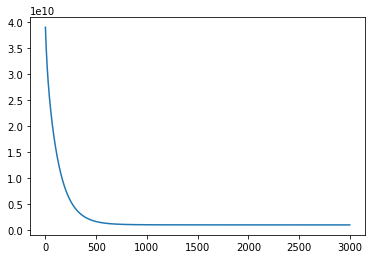

[[106869.40918361545 167811.280424568 176438.30243220396 ...
  198828.70618937092 110356.22324062031 259903.11038009718]] 983715360.8702807


In [336]:
y_pred_test,costs = model(x_train, y_train_orig, x_test, 3000, 0.002)
print(y_pred_test, costs[-1])